# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

1. Best subset selection 4/4
2. Forward and backwards stepwise selection 3/3
3. Training and test error 3/3

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [ ]:
set.seed(15)
n <- 100
X <- rnorm(n, mean = 0, sd = 1)
epsilon <- rnorm (n, mean = 0, sd = 1)
b0 <- 2.5
b1 <- 3.5
b2 <- -1.0
b3 <- 0.3

Y <- b0 + b1 * X + b2 * X^2 + b3 * X^3 + epsilon

data <- data.frame (X= X, Y = Y)

head(data)


,X,Y
,<dbl>,<dbl>
1,0.2588229,3.30406654
2,1.8311207,7.36818873
3,-0.3396186,-0.02383725
4,0.8971982,6.51723137
5,0.4880163,5.08387356
6,-1.2553858,-4.39816130


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [ ]:
install.packages("leaps")
library(leaps)
poly <- data.frame (Y=Y)
for (i in 1:10) {
  poly [[paste0("X", i)]] <- X^i
}
regfit <- regsubsets(Y ~ ., data = poly, nvmax = 10)
reg.summary <- summary(regfit)
print(reg.summary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(Y ~ ., data = poly, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" " " " " "*" " " " " " " " " " " " "
3  ( 1 )  "*" " " "*" "*" " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" " " "*" " " "*" "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" " " "*" "*" "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

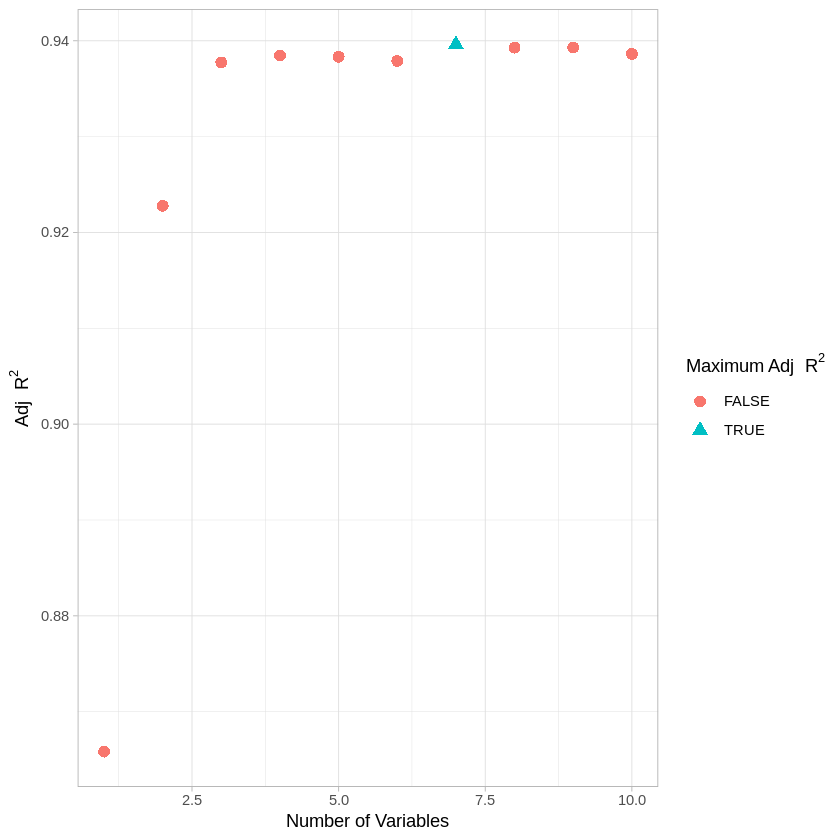

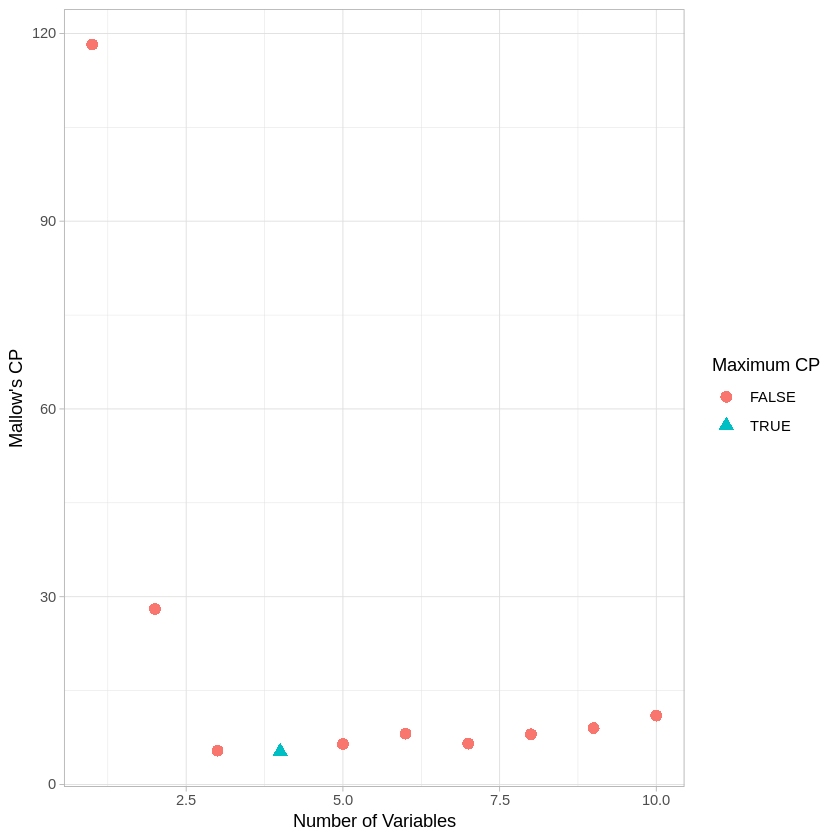

(Intercept)          X1          X3          X4 
  1.8808542   3.5090539   0.2985483  -0.1857347

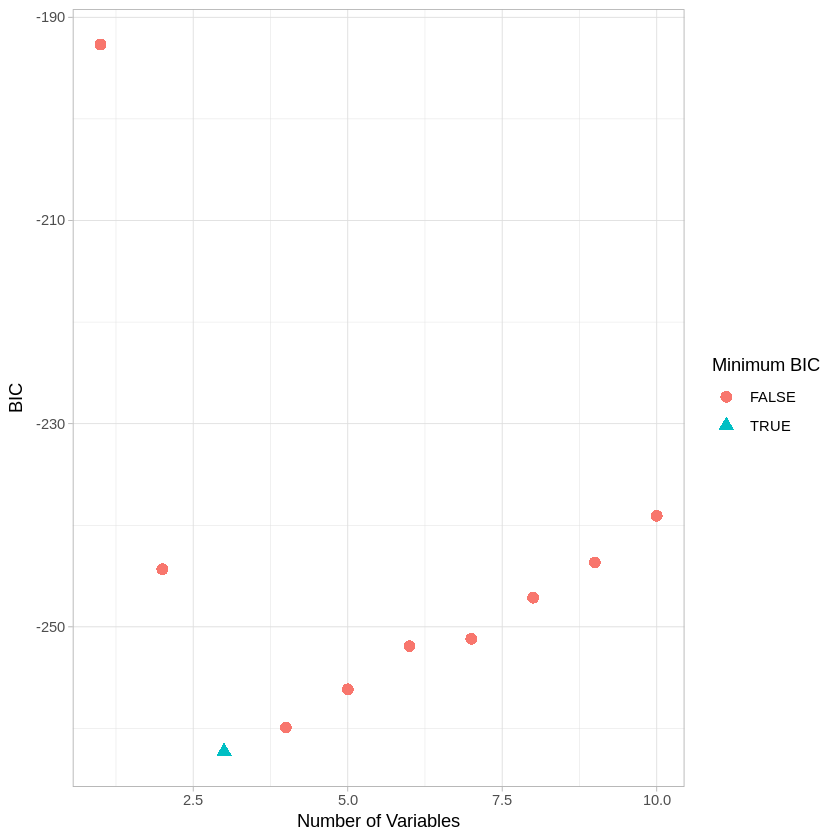

In [ ]:
numvar <- 1: length(reg.summary$rss)
allfalse <- rep(FALSE, length (reg.summary$rss))

adjr2.df <- data.frame (numvar = numvar,
                        adjr2 = reg.summary$adjr2,
                        maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE

library(ggplot2)

ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE

ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

best_bic <- which.min(reg.summary$bic)
coef(regfit, id = best_bic)


> The best model is BIC that includes 3 variables. This is better than the other model because prevent overfitting by explaining the data with less variables.
> Coefficients : Intercept= 1.888     X1 = 3.509  X3= 0.299 X4= -0.186

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

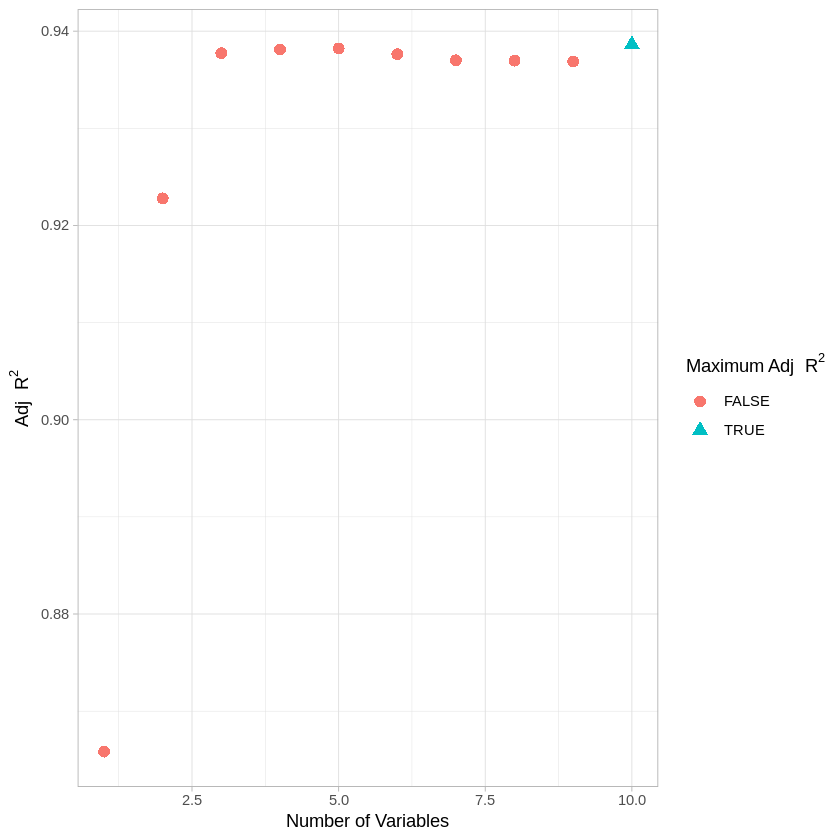

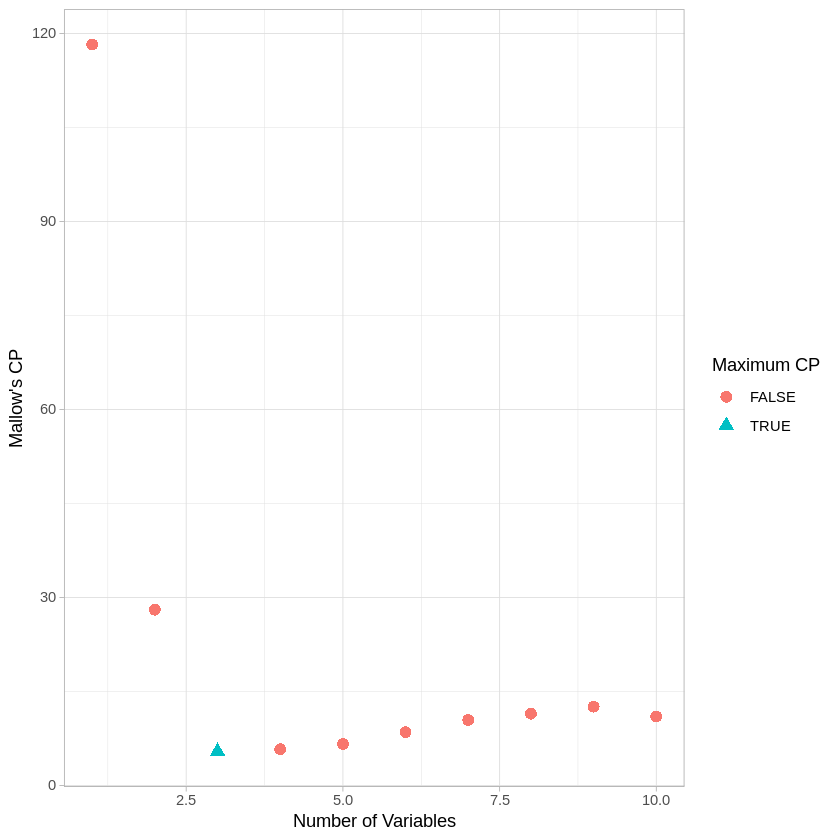

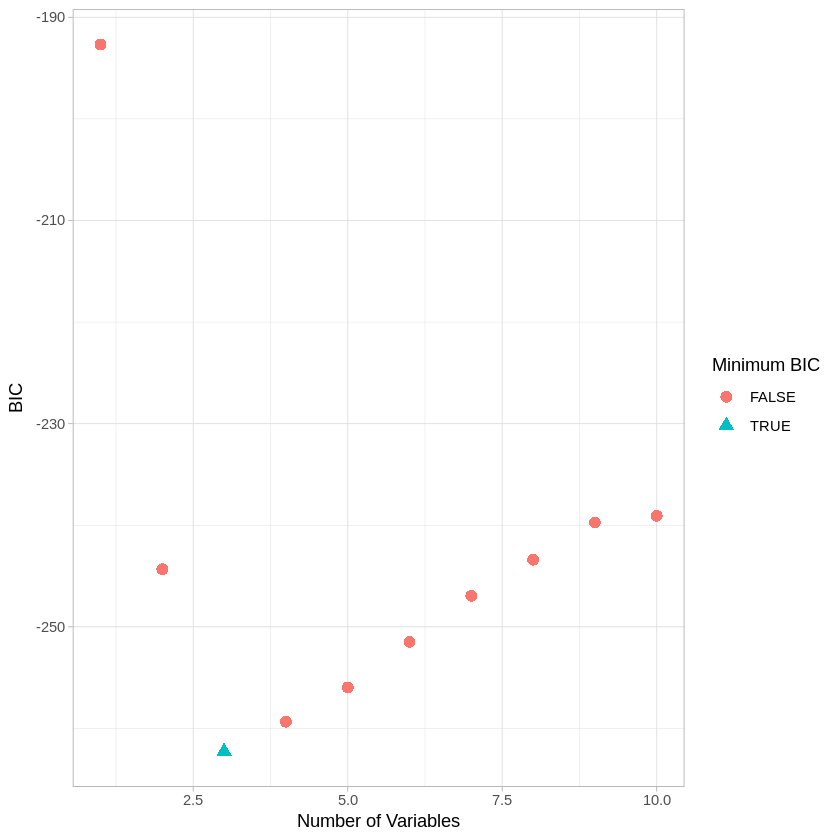

In [ ]:
reg.fwd <- regsubsets(Y ~ ., data = poly, nvmax = 10, method = "forward")
fwd.summary <- summary(reg.fwd)
reg.bck <- regsubsets(Y ~ ., data = poly, nvmax = 10, method = "backward")
bck.summary <- summary(reg.bck)

plot_metrics <- function(summary_obj, method_name) {
numvar <- 1: length(summary_obj$rss)
allfalse <- rep(FALSE, length (summary_obj$rss))

adjr2.df <- data.frame (numvar = numvar,
                        adjr2 = summary_obj$adjr2,
                        maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(summary_obj$adjr2)] <- TRUE


p1 <- ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)


cp.df <- data.frame(numvar = numvar, cp = summary_obj$cp, mincp <- allfalse)
cp.df$mincp[which.min(summary_obj$cp)] <- TRUE

p2 <- ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

bic.df <- data.frame(numvar = numvar,bic = summary_obj$bic, minbic <- allfalse)
bic.df$minbic[which.min(summary_obj$bic)] <- TRUE
p3 <- ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) + theme_light() +
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

best_bic <- which.min(reg.summary$bic)
coef(summary_obj, id = best_bic)

return(list(adjr2 = p1, cp = p2, bic = p3))
}

fwd_plots <- plot_metrics(fwd.summary, "Forward")
fwd_plots$adjr2
fwd_plots$cp
fwd_plots$bic




In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

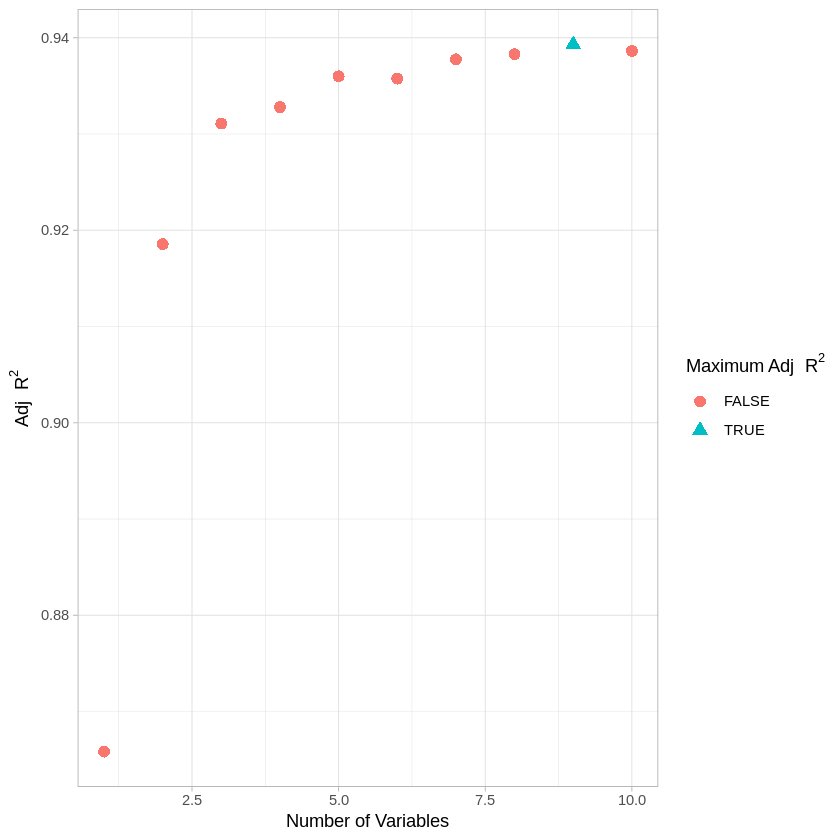

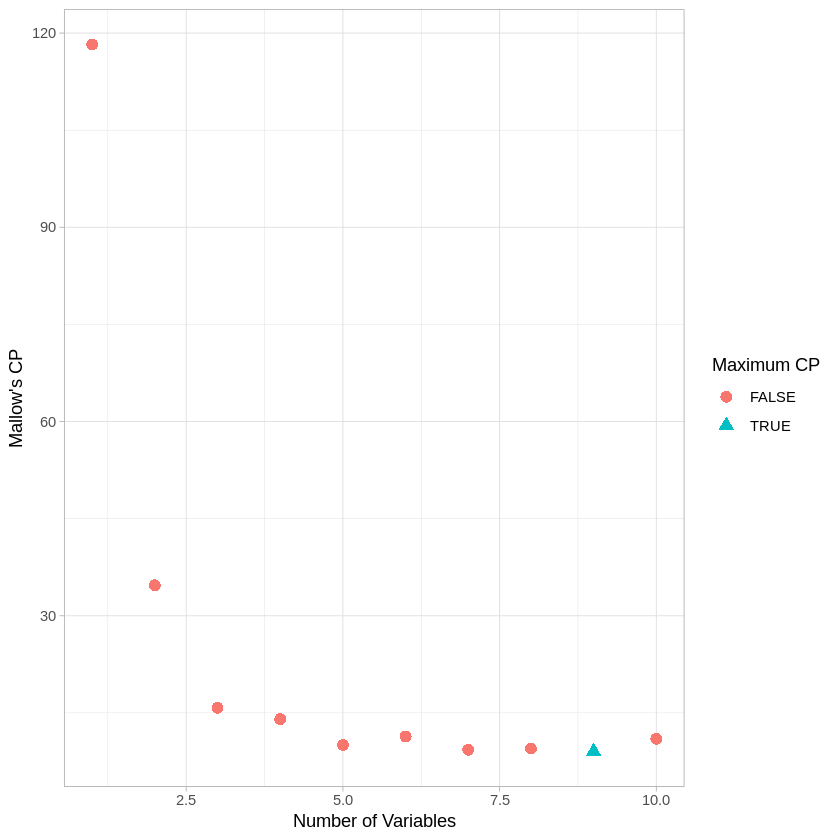

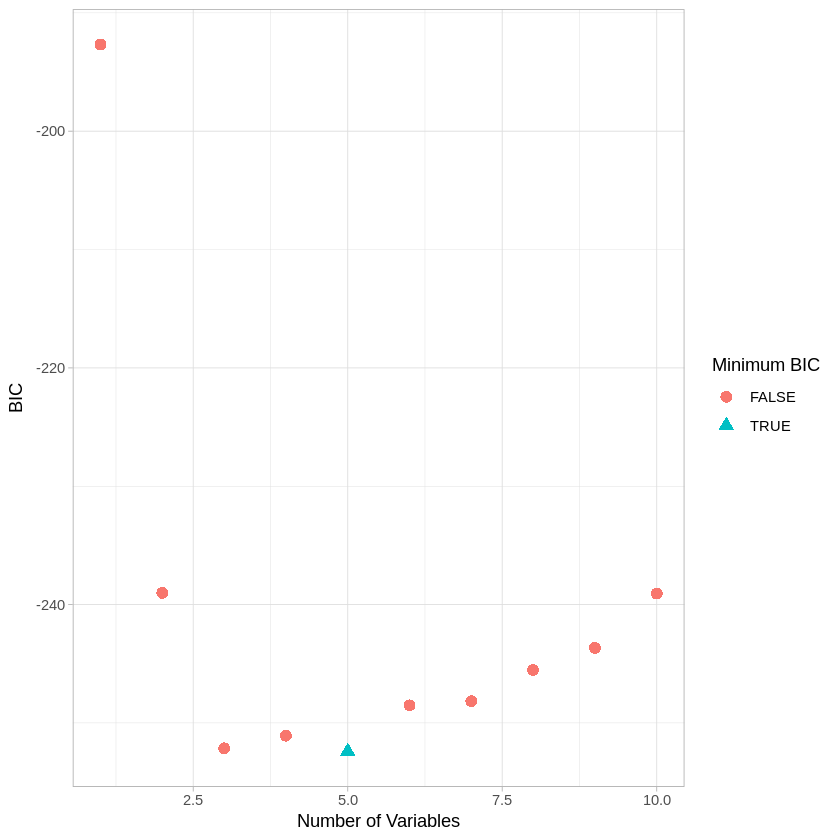

In [ ]:
bck_plots <- plot_metrics(bck.summary, "Backward")
bck_plots$adjr2
bck_plots$cp
bck_plots$bic

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.


> In general, BIC is the best model because it usually target 3-5 variables in all the models. Adj R2 generate more complex models between 7-10 variables and Mallow's Cp is the intermediate option and it's not as consistent as the others.
> Mallow's cp : In the forward model propose 3 variables but in backwards and the initial model suggested 9 predictors.



---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [ ]:
set.seed(42)
n <- 1000
p <- 20
X <- matrix (rnorm(n * p), nrow = n, ncol = p)
beta <- rnorm(p)
beta[sample (1:p, p/2)] <- 0
epsilon <- rnorm (n)
Y <- X %*% beta + epsilon

X_train <- X[1:100, ]
Y_train <- Y[1:100]
X_test <- X [101:1000, ]
Y_test <- Y [101:1000]

train_data <- data.frame (X_test)
train_data$Y <- Y_train

test_data <- data.frame (X_test)
test_data$Y <- Y_test

head(train_data)
head(test_data)



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.2009654,-0.6502844,-0.58693858,1.3784319,-1.1671305,-0.82962899,-0.0352970,0.07498591,-0.02819818,0.41757379,⋯,-0.1460848,-0.4961653,0.44401240,1.41284745,-1.0736515,-0.88550514,0.15232046,-0.12855798,0.68532077,0.3469656
2,1.0447511,-1.0031832,0.92697573,-2.9531373,-0.3003524,1.34652635,-0.2961731,0.01466264,1.88097341,-1.25821221,⋯,-1.3660664,-0.1732976,0.08660065,-0.46057561,-0.4901758,0.72829534,0.03774388,0.32830180,0.14736532,-3.2443978
3,-1.0032086,-0.5351139,-0.06540585,0.9558366,0.7699740,-1.61987925,0.7385071,0.72672071,0.38313597,-0.27412618,⋯,1.1738167,-0.8551113,-1.00741697,0.29072654,0.6679306,-1.14545777,-0.01625279,0.07421414,-0.76519645,0.2339855
4,1.8484819,-0.1104146,-0.93711176,1.0600342,0.2402628,0.54613131,0.4282353,1.30700634,-0.27688439,-0.70245049,⋯,1.0772858,2.3681367,0.59074710,-0.07225178,-0.9328601,-1.14558212,1.28653120,0.02960245,-0.08544881,-1.1922828
5,-0.6667734,0.6004302,-0.63385943,1.3509606,0.7541688,0.09108982,2.0255723,0.80264791,1.16897382,0.04376261,⋯,0.1444249,-0.6012352,-0.32387025,2.14153904,-0.2100964,-0.06068929,-0.08115271,-0.92266559,-0.50631068,2.6547325
6,0.1055138,0.4158451,-0.57522429,-0.4015557,-1.7690816,-2.31379991,-0.2530586,-0.57778801,-1.56107339,-0.02940494,⋯,0.4979507,-0.3730911,0.75036917,1.36488723,0.5927277,-0.13481395,0.11689973,-0.20520534,-0.17418671,5.2862490


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.2009654,-0.6502844,-0.58693858,1.3784319,-1.1671305,-0.82962899,-0.0352970,0.07498591,-0.02819818,0.41757379,⋯,-0.1460848,-0.4961653,0.44401240,1.41284745,-1.0736515,-0.88550514,0.15232046,-0.12855798,0.68532077,1.5821326
2,1.0447511,-1.0031832,0.92697573,-2.9531373,-0.3003524,1.34652635,-0.2961731,0.01466264,1.88097341,-1.25821221,⋯,-1.3660664,-0.1732976,0.08660065,-0.46057561,-0.4901758,0.72829534,0.03774388,0.32830180,0.14736532,-0.4981667
3,-1.0032086,-0.5351139,-0.06540585,0.9558366,0.7699740,-1.61987925,0.7385071,0.72672071,0.38313597,-0.27412618,⋯,1.1738167,-0.8551113,-1.00741697,0.29072654,0.6679306,-1.14545777,-0.01625279,0.07421414,-0.76519645,2.0106332
4,1.8484819,-0.1104146,-0.93711176,1.0600342,0.2402628,0.54613131,0.4282353,1.30700634,-0.27688439,-0.70245049,⋯,1.0772858,2.3681367,0.59074710,-0.07225178,-0.9328601,-1.14558212,1.28653120,0.02960245,-0.08544881,5.3404845
5,-0.6667734,0.6004302,-0.63385943,1.3509606,0.7541688,0.09108982,2.0255723,0.80264791,1.16897382,0.04376261,⋯,0.1444249,-0.6012352,-0.32387025,2.14153904,-0.2100964,-0.06068929,-0.08115271,-0.92266559,-0.50631068,1.5740395
6,0.1055138,0.4158451,-0.57522429,-0.4015557,-1.7690816,-2.31379991,-0.2530586,-0.57778801,-1.56107339,-0.02940494,⋯,0.4979507,-0.3730911,0.75036917,1.36488723,0.5927277,-0.13481395,0.11689973,-0.20520534,-0.17418671,-2.2574007


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

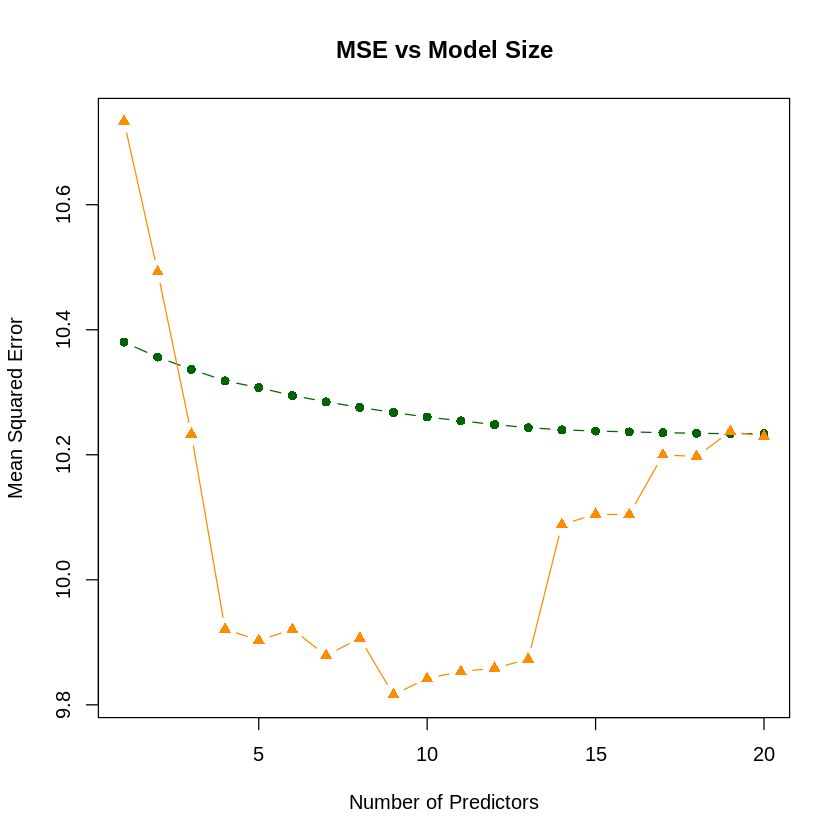

In [ ]:


train <- data.frame(train_data)

best_sub <- regsubsets(Y ~ ., data = train, nvmax = 20)


test_df <- data.frame(test_data)

train_mse <- rep(NA, 20)
test_mse <- rep(NA, 20)

for (i in 1:20) {
  coef_i <- coef(best_sub, id = i)

  vars <- names(coef_i)[-1]
  train_pre <- as.matrix(train [, vars, drop = FALSE]) %*% coef_i[vars] + coef_i[1]
  train_mse[i] <- mean((train_df$Y - train_pre)^2)

  test_pre <- as.matrix(test_df[, vars, drop = FALSE]) %*% coef_i[vars] + coef_i[1]
  test_mse[i] <- mean((test_df$Y - test_pre)^2)
}

plot(1:20, train_mse, type = "b", pch = 16, col = "darkgreen",
     xlab = "Number of Predictors", ylab = "Mean Squared Error",
     ylim = range(c(train_mse, test_mse)),
     main = "MSE vs Model Size")
     lines(1:20, test_mse, type = "b", pch = 17, col = "darkorange")


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
best_size <- which.min(test_mse)
cat("Best model size MSE:", best_size, "\n")
true_nonzero <- sum(beta != 0)
cat("Number of true non-zero coefficients in the data-generating model:", true_nonzero, "\n")



Best model size MSE: 9 
Number of true non-zero coefficients in the data-generating model: 10 


> The best model is close to the actual model used to simulate the data, this means the performance is good. Only relevant features were identified. Best model it is more parsimonious because it has less predictors but is still robust.  
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I used Chat GPT to do troubleshooting